@article{Ranftl2020,
	author    = {Ren\'{e} Ranftl and Katrin Lasinger and David Hafner and Konrad Schindler and Vladlen Koltun},
	title     = {Towards Robust Monocular Depth Estimation: Mixing Datasets for Zero-shot Cross-dataset Transfer},
	journal   = {IEEE Transactions on Pattern Analysis and Machine Intelligence (TPAMI)},
	year      = {2020},
}

@article{Ranftl2021,
	author    = {Ren\'{e} Ranftl and Alexey Bochkovskiy and Vladlen Koltun},
	title     = {Vision Transformers for Dense Prediction},
	journal   = {ArXiv preprint},
	year      = {2021},
}

Model Description
MiDaS computes relative inverse depth from a single image. The repository provides multiple models that cover different use cases ranging from a small, high-speed model to a very large model that provide the highest accuracy. The models have been trained on 10 distinct datasets using multi-objective optimization to ensure high quality on a wide range of inputs.

Dependencies
MiDaS depends on timm. Install with

`pip install timm`	

In [4]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.5491, 0.3078, 0.8809],
        [0.1446, 0.5567, 0.4588],
        [0.7057, 0.0213, 0.4714],
        [0.5636, 0.7373, 0.8581],
        [0.6263, 0.6296, 0.2255]])


# Example Usage

Download an image from the PyTorch homepage

In [14]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

('dog.jpg', <http.client.HTTPMessage at 0x2916ae09490>)

In [15]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in C:\Users\Agent/.cache\torch\hub\intel-isl_MiDaS_master


In [16]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [17]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\Agent/.cache\torch\hub\intel-isl_MiDaS_master


In [18]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [19]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

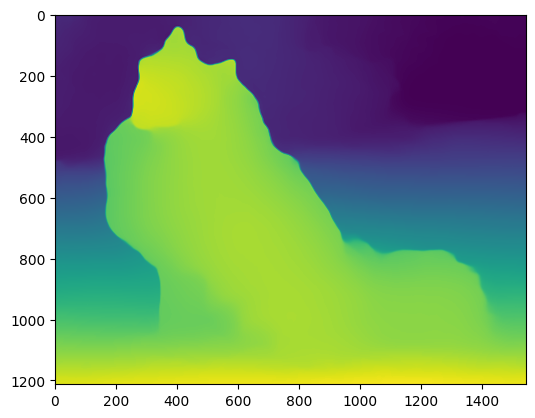

In [20]:
plt.imshow(output)
# plt.show()

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)


device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()


midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform


#img = cv2.imread(filename)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


cap = cv.VideoCapture('2D-video-depth-estimation\iiTJaBv.mp4')
while True:
    ret, frame = cap.read()
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    input_batch = transform(frame).to(device)

    with torch.no_grad():
        prediction = midas(input_batch)

        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=frame.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    output = prediction.cpu().numpy()
    # if frame is read correctly ret is True
    if ret == False:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    #cv.imshow('frame', frame)
    if cv.waitKey(25) == ord('q'):
        break
    #else:
    #    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
cap.release()
#cv.destroyAllWindows()

Using cache found in C:\Users\Agent/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\Agent/.cache\torch\hub\intel-isl_MiDaS_master


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [2]:
"""Compute depth maps for images in the input folder.
"""
import os
import glob
import torch
import utils
import cv2
import argparse
import time

import numpy as np

from imutils.video import VideoStream
from midas.model_loader import default_models, load_model

first_execution = True
def process(device, model, model_type, image, input_size, target_size, optimize, use_camera):
    """
    Run the inference and interpolate.

    Args:
        device (torch.device): the torch device used
        model: the model used for inference
        model_type: the type of the model
        image: the image fed into the neural network
        input_size: the size (width, height) of the neural network input (for OpenVINO)
        target_size: the size (width, height) the neural network output is interpolated to
        optimize: optimize the model to half-floats on CUDA?
        use_camera: is the camera used?

    Returns:
        the prediction
    """
    global first_execution

    if "openvino" in model_type:
        if first_execution or not use_camera:
            print(f"    Input resized to {input_size[0]}x{input_size[1]} before entering the encoder")
            first_execution = False

        sample = [np.reshape(image, (1, 3, *input_size))]
        prediction = model(sample)[model.output(0)][0]
        prediction = cv2.resize(prediction, dsize=target_size,
                                interpolation=cv2.INTER_CUBIC)
    else:
        sample = torch.from_numpy(image).to(device).unsqueeze(0)

        if optimize and device == torch.device("cuda"):
            if first_execution:
                print("  Optimization to half-floats activated. Use with caution, because models like Swin require\n"
                      "  float precision to work properly and may yield non-finite depth values to some extent for\n"
                      "  half-floats.")
            sample = sample.to(memory_format=torch.channels_last)
            sample = sample.half()

        if first_execution or not use_camera:
            height, width = sample.shape[2:]
            print(f"    Input resized to {width}x{height} before entering the encoder")
            first_execution = False

        prediction = model.forward(sample)
        prediction = (
            torch.nn.functional.interpolate(
                prediction.unsqueeze(1),
                size=target_size[::-1],
                mode="bicubic",
                align_corners=False,
            )
            .squeeze()
            .cpu()
            .numpy()
        )

    return prediction


def create_side_by_side(image, depth, grayscale):
    """
    Take an RGB image and depth map and place them side by side. This includes a proper normalization of the depth map
    for better visibility.

    Args:
        image: the RGB image
        depth: the depth map
        grayscale: use a grayscale colormap?

    Returns:
        the image and depth map place side by side
    """
    depth_min = depth.min()
    depth_max = depth.max()
    normalized_depth = 255 * (depth - depth_min) / (depth_max - depth_min)
    normalized_depth *= 3

    right_side = np.repeat(np.expand_dims(normalized_depth, 2), 3, axis=2) / 3
    if not grayscale:
        right_side = cv2.applyColorMap(np.uint8(right_side), cv2.COLORMAP_INFERNO)

    if image is None:
        return right_side
    else:
        return np.concatenate((image, right_side), axis=1)


def run(input_path, output_path, model_path, model_type="dpt_beit_large_512", optimize=False, side=False, height=None,
        square=False, grayscale=False):
    """Run MonoDepthNN to compute depth maps.

    Args:
        input_path (str): path to input folder
        output_path (str): path to output folder
        model_path (str): path to saved model
        model_type (str): the model type
        optimize (bool): optimize the model to half-floats on CUDA?
        side (bool): RGB and depth side by side in output images?
        height (int): inference encoder image height
        square (bool): resize to a square resolution?
        grayscale (bool): use a grayscale colormap?
    """
    print("Initialize")

    # select device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device: %s" % device)

    model, transform, net_w, net_h = load_model(device, model_path, model_type, optimize, height, square)

    # get input
    if input_path is not None:
        image_names = glob.glob(os.path.join(input_path, "*"))
        num_images = len(image_names)
    else:
        print("No input path specified. Grabbing images from camera.")

    # create output folder
    if output_path is not None:
        os.makedirs(output_path, exist_ok=True)

    print("Start processing")

    if input_path is not None:
        if output_path is None:
            print("Warning: No output path specified. Images will be processed but not shown or stored anywhere.")
        for index, image_name in enumerate(image_names):

            print("  Processing {} ({}/{})".format(image_name, index + 1, num_images))

            # input
            original_image_rgb = utils.read_image(image_name)  # in [0, 1]
            image = transform({"image": original_image_rgb})["image"]

            # compute
            with torch.no_grad():
                prediction = process(device, model, model_type, image, (net_w, net_h), original_image_rgb.shape[1::-1],
                                     optimize, False)

            # output
            if output_path is not None:
                filename = os.path.join(
                    output_path, os.path.splitext(os.path.basename(image_name))[0] + '-' + model_type
                )
                if not side:
                    utils.write_depth(filename, prediction, grayscale, bits=2)
                else:
                    original_image_bgr = np.flip(original_image_rgb, 2)
                    content = create_side_by_side(original_image_bgr*255, prediction, grayscale)
                    cv2.imwrite(filename + ".png", content)
                utils.write_pfm(filename + ".pfm", prediction.astype(np.float32))

    else:
        with torch.no_grad():
            fps = 1
            video = VideoStream(0).start()
            time_start = time.time()
            frame_index = 0
            while True:
                frame = video.read()
                if frame is not None:
                    original_image_rgb = np.flip(frame, 2)  # in [0, 255] (flip required to get RGB)
                    image = transform({"image": original_image_rgb/255})["image"]

                    prediction = process(device, model, model_type, image, (net_w, net_h),
                                         original_image_rgb.shape[1::-1], optimize, True)

                    original_image_bgr = np.flip(original_image_rgb, 2) if side else None
                    content = create_side_by_side(original_image_bgr, prediction, grayscale)
                    cv2.imshow('MiDaS Depth Estimation - Press Escape to close window ', content/255)

                    if output_path is not None:
                        filename = os.path.join(output_path, 'Camera' + '-' + model_type + '_' + str(frame_index))
                        cv2.imwrite(filename + ".png", content)

                    alpha = 0.1
                    if time.time()-time_start > 0:
                        fps = (1 - alpha) * fps + alpha * 1 / (time.time()-time_start)  # exponential moving average
                        time_start = time.time()
                    print(f"\rFPS: {round(fps,2)}", end="")

                    if cv2.waitKey(1) == 27:  # Escape key
                        break

                    frame_index += 1
        print()

    print("Finished")


if __name__ == "__main__":
    parser = argparse.ArgumentParser()

    parser.add_argument('-i', '--input_path',
                        default=None,
                        help='Folder with input images (if no input path is specified, images are tried to be grabbed '
                             'from camera)'
                        )

    parser.add_argument('-o', '--output_path',
                        default=None,
                        help='Folder for output images'
                        )

    parser.add_argument('-m', '--model_weights',
                        default=None,
                        help='Path to the trained weights of model'
                        )

    parser.add_argument('-t', '--model_type',
                        default='dpt_beit_large_512',
                        help='Model type: '
                             'dpt_beit_large_512, dpt_beit_large_384, dpt_beit_base_384, dpt_swin2_large_384, '
                             'dpt_swin2_base_384, dpt_swin2_tiny_256, dpt_swin_large_384, dpt_next_vit_large_384, '
                             'dpt_levit_224, dpt_large_384, dpt_hybrid_384, midas_v21_384, midas_v21_small_256 or '
                             'openvino_midas_v21_small_256'
                        )

    parser.add_argument('-s', '--side',
                        action='store_true',
                        help='Output images contain RGB and depth images side by side'
                        )

    parser.add_argument('--optimize', dest='optimize', action='store_true', help='Use half-float optimization')
    parser.set_defaults(optimize=False)

    parser.add_argument('--height',
                        type=int, default=None,
                        help='Preferred height of images feed into the encoder during inference. Note that the '
                             'preferred height may differ from the actual height, because an alignment to multiples of '
                             '32 takes place. Many models support only the height chosen during training, which is '
                             'used automatically if this parameter is not set.'
                        )
    parser.add_argument('--square',
                        action='store_true',
                        help='Option to resize images to a square resolution by changing their widths when images are '
                             'fed into the encoder during inference. If this parameter is not set, the aspect ratio of '
                             'images is tried to be preserved if supported by the model.'
                        )
    parser.add_argument('--grayscale',
                        action='store_true',
                        help='Use a grayscale colormap instead of the inferno one. Although the inferno colormap, '
                             'which is used by default, is better for visibility, it does not allow storing 16-bit '
                             'depth values in PNGs but only 8-bit ones due to the precision limitation of this '
                             'colormap.'
                        )

    args = parser.parse_args()


    if args.model_weights is None:
        args.model_weights = default_models[args.model_type]

    # set torch options
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True

    # compute depth maps
    run(args.input_path, args.output_path, args.model_weights, args.model_type, args.optimize, args.side, args.height,
        args.square, args.grayscale)

ModuleNotFoundError: No module named 'utils'